In [3]:
library(tidyverse)
library(sf)
library(ggmap)
library(rnoaa)
library(spData)
data(world)
data(us_states)

Registered S3 method overwritten by 'hoardr':
  method           from
  print.cache_info httr

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`



In [4]:
dataurl = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/shapefile/IBTrACS.NA.list.v04r00.points.zip"
tdir = tempdir()
download.file(dataurl, destfile = file.path(tdir,"temp.zip"))
unzip(file.path(tdir,"temp.zip"), exdir = tdir)
list.files(tdir)
storm_data = read_sf(list.files(tdir, pattern=".shp", full.names = T))
names(storm_data)
head(storm_data[1:3, 1:3])

[1] "IBTrACS.NA.list.v04r00.points.dbf" "IBTrACS.NA.list.v04r00.points.prj"
[3] "IBTrACS.NA.list.v04r00.points.shp" "IBTrACS.NA.list.v04r00.points.shx"
[5] "temp.zip"

[1] "SID"        "SEASON"     "NUMBER"     "BASIN"      "SUBBASIN"  
  [6] "NAME"       "ISO_TIME"   "NATURE"     "LAT"        "LON"       
 [11] "WMO_WIND"   "WMO_PRES"   "WMO_AGENCY" "TRACK_TYPE" "DIST2LAND" 
 [16] "LANDFALL"   "IFLAG"      "USA_AGENCY" "USA_ATCFID" "USA_LAT"   
 [21] "USA_LON"    "USA_RECORD" "USA_STATUS" "USA_WIND"   "USA_PRES"  
 [26] "USA_SSHS"   "USA_R34_NE" "USA_R34_SE" "USA_R34_SW" "USA_R34_NW"
 [31] "USA_R50_NE" "USA_R50_SE" "USA_R50_SW" "USA_R50_NW" "USA_R64_NE"
 [36] "USA_R64_SE" "USA_R64_SW" "USA_R64_NW" "USA_POCI"   "USA_ROCI"  
 [41] "USA_RMW"    "USA_EYE"    "TOK_LAT"    "TOK_LON"    "TOK_GRADE" 
 [46] "TOK_WIND"   "TOK_PRES"   "TOK_R50_DR" "TOK_R50_L"  "TOK_R50_S" 
 [51] "TOK_R30_DR" "TOK_R30_L"  "TOK_R30_S"  "TOK_LAND"   "CMA_LAT"   
 [56] "CMA_LON"    "CMA_CAT"    "CMA_WIND"   "CMA_PRES"   "HKO_LAT"   
 [61] "HKO_LON"    "HKO_CAT"    "HKO_WIND"   "HKO_PRES"   "NEW_LAT"   
 [66] "NEW_LON"    "NEW_GRADE"  "NEW_WIND"   "NEW_PRES"   "NEW_CI"    
 [71] "NEW_DP"     "NEW_POCI"   "REU_LAT"    "REU_LON"    "REU_TYPE"  
 [76] "REU_WIND"   "REU_PRES"   "REU_TNUM"   "REU_CI"     "REU_RMW"   
 [81] "REU_R34_NE" "REU_R34_SE" "REU_R34_SW" "REU_R34_NW" "REU_R50_NE"
 [86] "REU_R50_SE" "REU_R50_SW" "REU_R50_NW" "REU_R64_NE" "REU_R64_SE"
 [91] "REU_R64_SW" "REU_R64_NW" "BOM_LAT"    "BOM_LON"    "BOM_TYPE"  
 [96] "BOM_WIND"   "BOM_PRES"   "BOM_TNUM"   "BOM_CI"     "BOM_RMW"   
[101] "BOM_R34_NE" "BOM_R34_SE" "BOM_R34_SW" "BOM_R34_NW" "BOM_R50_NE"
[106] "BOM_R50_SE" "BOM_R50_SW" "BOM_R50_NW" "BOM_R64_NE" "BOM_R64_SE"
[111] "BOM_R64_SW" "BOM_R64_NW" "BOM_ROCI"   "BOM_POCI"   "BOM_EYE"   
[116] "BOM_POS_FL" "BOM_PRS_FL" "NAD_LAT"    "NAD_LON"    "NAD_CAT"   
[121] "NAD_WIND"   "NAD_PRES"   "WEL_LAT"    "WEL_LON"    "WEL_WIND"  
[126] "WEL_PRES"   "DS8_LAT"    "DS8_LON"    "DS8_STAGE"  "DS8_WIND"  
[131] "DS8_PRES"   "TD6_LAT"    "TD6_LON"    "TD6_STAGE"  "TD6_WIND"  
[136] "TD6_PRES"   "TD5_LAT"    "TD5_LON"    "TD5_WIND"   "TD5_PRES"  
[141] "TD5_ROCI"   "NEU_LAT"    "NEU_LON"    "NEU_CLASS"  "NEU_WIND"  
[146] "NEU_PRES"   "MLC_LAT"    "MLC_LON"    "MLC_CLASS"  "MLC_WIND"  
[151] "MLC_PRES"   "USA_GUST"   "BOM_GUST"   "BOM_GUSTP"  "REU_GUST"  
[156] "REU_GUSTP"  "USA_SEAHGT" "USA_SEA_NE" "USA_SEA_SE" "USA_SEA_SW"
[161] "USA_SEA_NW" "STORM_SPD"  "STORM_DR"   "year"       "month"     
[166] "day"        "hour"       "min"        "geometry"

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

SID,SEASON,NUMBER,geometry
<chr>,<int>,<int>,<POINT [°]>
1851175N26270,1851,5,POINT (-90.4 26.1)
1851175N26270,1851,5,POINT (-90.7 26.2)
1851175N26270,1851,5,POINT (-91 26.3)


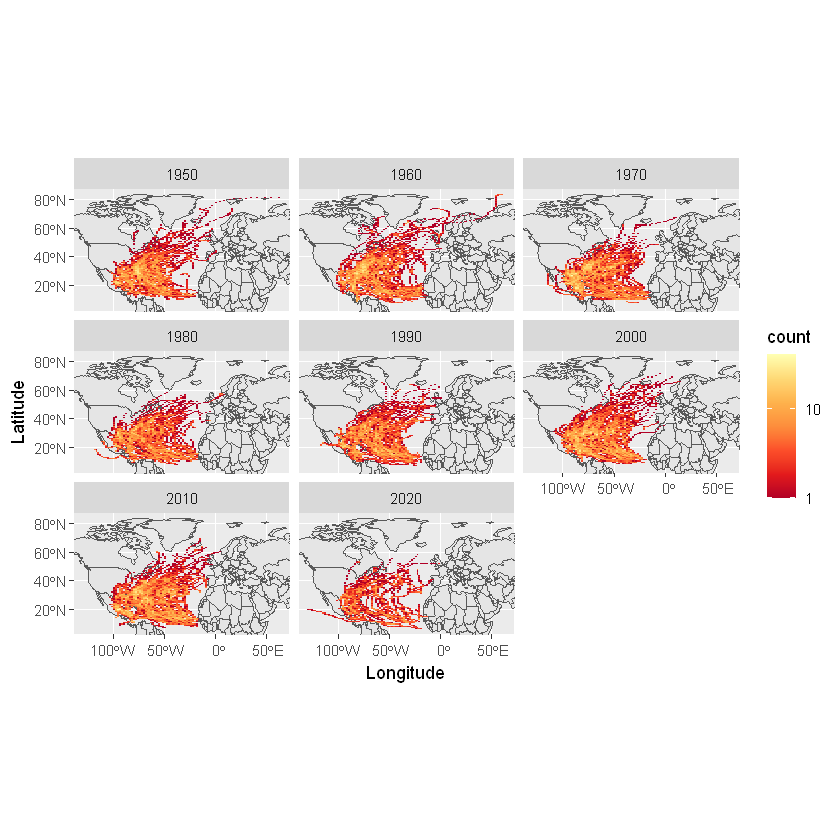

In [5]:
storms = storm_data %>% 
  filter(year >= 1950) %>% 
  mutate_if(is.numeric, function(x) ifelse(x == -999.0, NA, x)) %>% 
  mutate(decade = (floor(year/10)*10)) 

region = st_bbox(storm_data)

ggplot() +
  geom_sf(data = world) +
  stat_bin2d(data = storms, aes(y = st_coordinates(storms)[,2], x = st_coordinates(storms)[,1]), bins = 100) + 
  facet_wrap(~decade) +
  scale_fill_distiller(palette="YlOrRd", 
                       trans="log", 
                       direction=-1, 
                       breaks = c(1,10,100,1000)) + 
  coord_sf(ylim=region[c(2,4)], xlim=region[c(1,3)]) +
  labs(x = "Longitude", y = "Latitude")

In [6]:
states = us_states %>% 
  st_transform(crs = st_crs(storms)) %>% 
  rename(state = NAME)

storm_states = st_join(storms, states, join = st_intersects, left = F)

top5_states = storm_states %>% 
  st_set_geometry(NULL) %>% 
  group_by(state) %>% 
  dplyr::summarize(storms = length(unique(NAME))) %>% 
  arrange(desc(storms)) %>% 
  slice(1:5)

top5_states

state,storms
<chr>,<int>
Florida,86
North Carolina,66
Georgia,58
Texas,54
Louisiana,52
